## Exercise 2

Perform Logistic Regression via Gradient Descent

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Instructions: Plot the positive and negative examples on a
2D plot, using the option 'k+' for the positive
examples and 'ko' for the negative examples.

In [5]:
#import data
df = pd.read_csv('/home/smhaladuick/local/andrew_ng/ex2/ex2data1.txt', header=None)

In [6]:
df.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
#Summary Stats
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Text(0.5, 1.0, 'Admission Decision vs Test Scores')

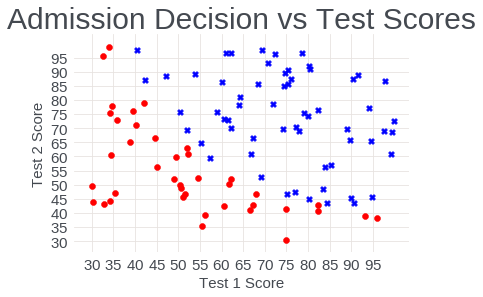

In [8]:
plt.scatter(df[df[2]==1][0], df[df[2]==1][1], marker="X", color="b")
plt.scatter(df[df[2]==0][0], df[df[2]==0][1], marker="o", color="r")
plt.xticks(np.arange(30,100,step=5))
plt.yticks(np.arange(30,100,step=5))
plt.xlabel("Test 1 Score")
plt.ylabel("Test 2 Score")
plt.title("Admission Decision vs Test Scores")

  % Instructions: Compute the sigmoid of each value of z (z can be a matrix,
  %               vector or scalar).
  g = 1./(1+exp(-z));

In [252]:
# SIGMOID Compute sigmoid function
# g = SIGMOID(z) computes the sigmoid of z.
# You need to return the following variables correctly 
# Instructions: Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).

def sigmoid(z):

    g = 1 / (1 + np.exp(-z))
    return g

In [264]:
# COSTFUNCTION Compute cost and gradient for logistic regression
def costFunction(theta, X, y):
    # Initialize variables
    m = len(y)  # number of training examples

    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))

    J = (1/m) * np.sum(error)
    grad = (1/m) * np.dot(X.T, (predictions - y))
    
    return J, grad

In [210]:
# Feature Normalization
def FeatureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X, mean, std

In [307]:
# Performs gradient descent
def gradientDescent(theta, X, y, alpha, numIts):
    
    #initialize
    m = len(y)
    J_hist = []

    #loop for each graient descent iteration
    for i in range(numIts):
        # run cost function
        J, grad = costFunction(theta, X, y)
        J_hist.append(J) #store J history

        #compute theta
        theta = theta - (alpha * grad)
    
    return J_hist, theta

In [290]:
data = df.values
X = data[:,[0,1]].reshape(m,2)
m, n = np.shape(X)[0], np.shape(X)[1] #num data points and num features

X_norm, X_mean, X_std = FeatureNormalization(X)
X = np.append(np.ones((m,1)), X, axis=1) #add zero column to front of X
X_norm = np.append(np.ones((m,1)), X_norm, axis=1)
y = data[:,[2]].reshape(m,1)

In [301]:
np.shape(y)

(100, 1)

In [308]:
theta = np.zeros((n+1, 1)) #initialize theta
J, grad = costFunction(theta, X_norm, y)
J, grad

(0.6931471805599453,
 array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [330]:
theta = np.zeros((n+1, 1)) #initialize theta
J_hist, theta = gradientDescent(theta, X_norm, y, alpha=1, numIts=1000)
J_hist[-1], theta

(0.20349778840675828,
 array([[1.71671348],
        [3.98908079],
        [3.72154954]]))

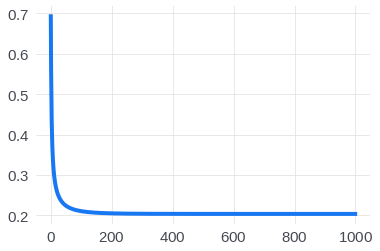

In [343]:
A = plt.plot(J_hist)

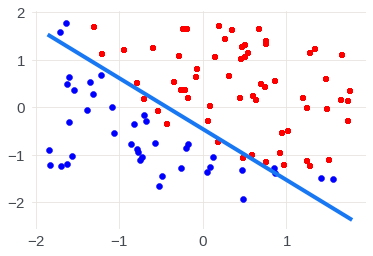

In [382]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X_norm[pos[:,0],1], X_norm[pos[:,0],2], c='r', marker='+', label="Admitted")
plt.scatter(X_norm[neg[:,0],1], X_norm[neg[:,0],2], c='b', marker='o', label="Not Admitted")

x_value= np.array([np.min(X_norm[:,1]),np.max(X_norm[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value, y_value)

In [402]:
def predict(theta, X):
# PREDICT Predict whether the label is 0 or 1 using learned logistic 
# p = PREDICT(theta, X) computes the predictions for X using a 
# threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    return sigmoid(np.dot(X, theta))

In [403]:
# predict admitted based on student scores
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
predict(theta, x_test)

array([0.77604289])

In [420]:
#determine the accuracy of the classifier
1 - sum(((predict(theta, X_norm) >= 0.5) - y)**2) / len(y)

array([0.89])

## Part 2
Perform Regularized Logistic Regression via Gradient Descent for comparison w Un-regularized

In [429]:
def costFunctionReg(theta, X, y, Lambda):
    # Initialize variables
    m = len(y)  # number of training examples

    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))

    J = (1/m) * np.sum(error) + (Lambda / (2 * m)) * sum(theta **2, 1)
    grad = (1/m) * np.dot(X.T, (predictions - y)) + ((Lambda / m) * theta)
    
    return J, grad

In [437]:
# Performs gradient descent
def gradientDescentReg(theta, X, y, alpha, numIts, Lambda):
    
    #initialize
    m = len(y)
    J_hist = []

    #loop for each graient descent iteration
    for i in range(numIts):
        # run cost function
        J, grad = costFunctionReg(theta, X, y, Lambda)
        J_hist.append(J) #store J history

        #compute theta
        theta = theta - (alpha * grad)
    
    return J_hist, theta

In [449]:
theta = np.zeros((n+1, 1)) #initialize theta
J_hist, theta = gradientDescentReg(theta, X_norm, y, alpha=1, numIts=1000, Lambda=100)
J_hist[-1], theta

(array([1.13193789]),
 array([[0.08033025],
        [0.22672212],
        [0.20254776]]))

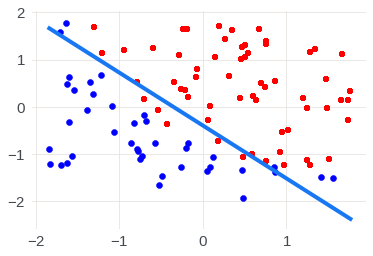

In [450]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X_norm[pos[:,0],1], X_norm[pos[:,0],2], c='r', marker='+', label="Admitted")
plt.scatter(X_norm[neg[:,0],1], X_norm[neg[:,0],2], c='b', marker='o', label="Not Admitted")

x_value= np.array([np.min(X_norm[:,1]),np.max(X_norm[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value, y_value)